In [4]:
import pandas as pd

df=pd.read_csv("/content/retailer.csv")

In [5]:
print(df.columns)
print(df.dtypes)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')
Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [7]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


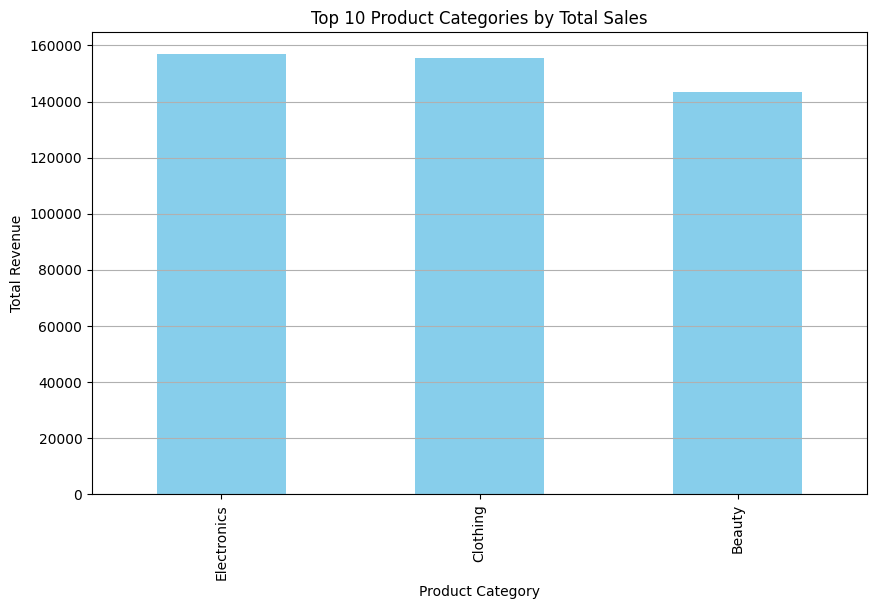

In [9]:
df["Total Amount"] = df["Quantity"] * df["Price per Unit"]
top_categories = df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False).head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_categories.plot(kind="bar", color="skyblue")
plt.title("Top 10 Product Categories by Total Sales")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.grid(axis="y")
plt.show()

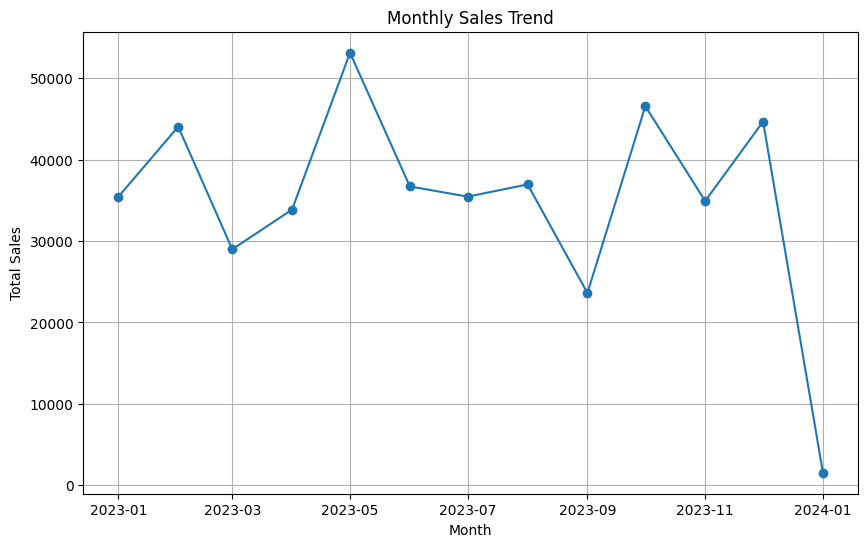

In [10]:
monthly_sales = df.groupby(df["Date"].dt.to_period("M"))["Total Amount"].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

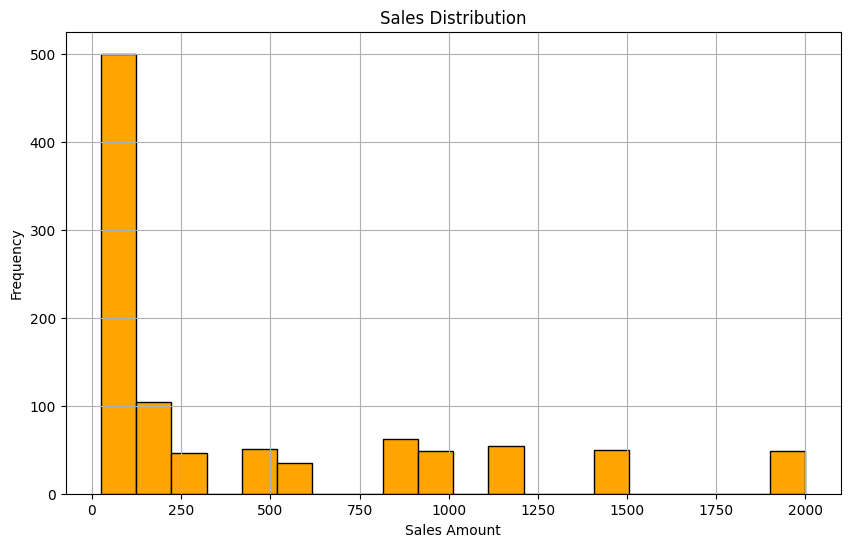

In [11]:
plt.figure(figsize=(10,6))
plt.hist(df["Total Amount"], bins=20, color="orange", edgecolor="black")
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

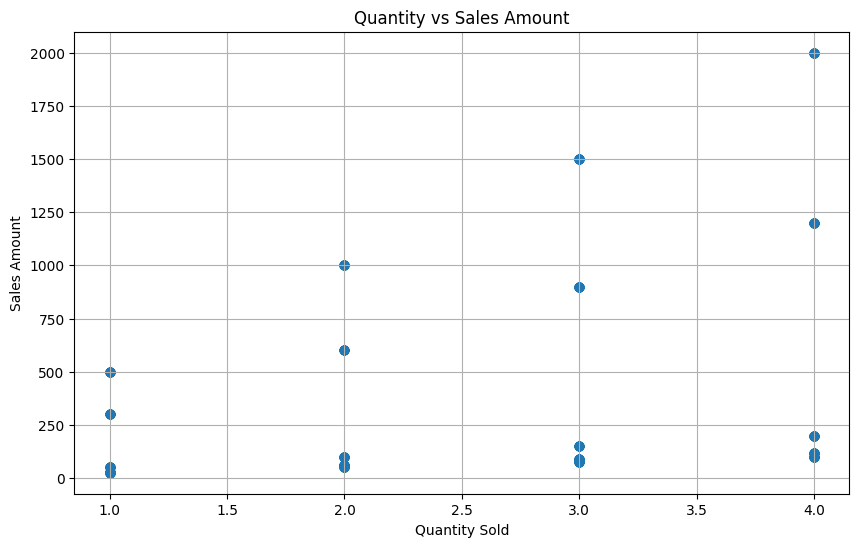

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(df["Quantity"], df["Total Amount"], alpha=0.6)
plt.title("Quantity vs Sales Amount")
plt.xlabel("Quantity Sold")
plt.ylabel("Sales Amount")
plt.grid(True)
plt.show()

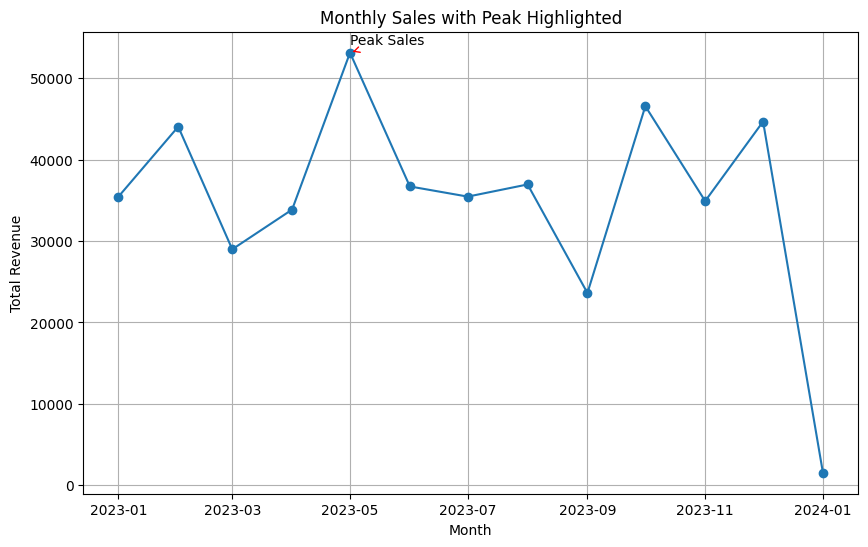

In [13]:
peak_month = monthly_sales.idxmax()
peak_val = monthly_sales.max()

plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o")
plt.annotate("Peak Sales", xy=(peak_month, peak_val),
             xytext=(peak_month, peak_val + 1000),
             arrowprops=dict(arrowstyle="->", color="red"))
plt.title("Monthly Sales with Peak Highlighted")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()